In [2]:
#import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [4]:
df_motion = pd.read_csv('clustering_columns.csv')

In [6]:
df_motion.head()

,shiftSinceLineset,motionSinceLineset,snap_motion_gap,init_rel_y_dis,end_rel_y_dis,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool
0,0,1,24,173,-1396,1569,-182,-107,-75,337.021739,46,-1397.0,0
1,0,1,0,556,-344,900,-195,-275,80,412.727273,22,-344.0,0
2,0,1,0,1082,582,500,-151,-117,-34,242.210526,19,582.0,0
3,0,1,41,41,-1463,1504,-897,-208,-689,307.711538,52,42.0,1
4,0,1,0,929,391,538,-242,-354,112,380.466667,15,938.0,1


In [8]:
# #get dummy variables for non-numeric columns

# df_motion = pd.get_dummies(df_motion, columns=['position'], drop_first=False, dtype='int')

In [10]:
from sklearn.preprocessing import StandardScaler

#standardize the variables before conducting PCA
scaler = StandardScaler()
scaler.fit(df_motion)
df_motion_scaled = scaler.transform(df_motion)

In [64]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=42)

In [66]:
pca.fit(df_motion_scaled)

PCA(n_components=5, random_state=42)

In [68]:
x_pca = pca.transform(df_motion_scaled)

In [70]:
df_motion_scaled.shape

(4154, 13)

In [72]:
x_pca.shape

(4154, 5)

In [74]:
# Perform PCA (already done in your code)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained:", np.sum(explained_variance))

Explained Variance Ratio: [0.23321856 0.20697553 0.15160379 0.09462299 0.09203554]
Total Variance Explained: 0.7784564113500753


C:\Users\etien\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\Users\etien\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\Users\etien\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(
C:\Users\etien\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Win

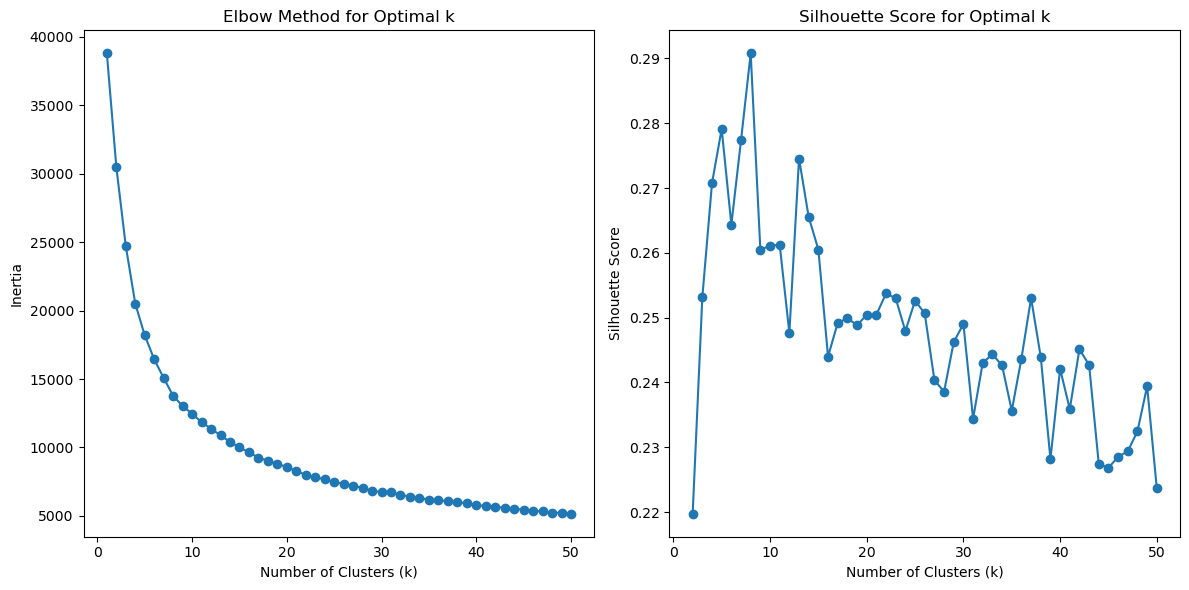

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a range of k values to try
k_range = range(1, 51)  # Trying k values from 1 to 50

# For storing inertia and silhouette scores
inertia = []
sil_scores = []

# Loop through each value of k
for k in k_range:
    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(x_pca)  # Use your PCA-transformed data (x_pca)

    # Compute inertia for Elbow Method
    inertia.append(kmeans.inertia_)

    # Compute silhouette score
    if k > 1:  # Silhouette score is only defined for k > 1
        sil_score = silhouette_score(x_pca, labels)
        sil_scores.append(sil_score)
    else:
        sil_scores.append(-1)  # For k=1, silhouette score is undefined


# Plot the Elbow Method (Inertia vs. k)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

# Plot the Silhouette Scores (Silhouette Score vs. k)
plt.subplot(1, 2, 2)
plt.plot(k_range[1:], sil_scores[1:], marker='o')  # Skip the first value (k=1)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')

plt.tight_layout()
plt.show()


In [78]:
#use n=15 based on this
kmeans = KMeans(n_clusters=15, random_state=42)  # Adjust clusters as needed
labels = kmeans.fit_predict(x_pca)

C:\Users\etien\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=17.
  warnings.warn(


In [80]:
kmeans.labels_

array([ 2,  8,  4, ...,  5, 13,  7])

In [82]:
#set labels as a column in original df

In [84]:
df_player_play_motion = pd.read_csv('df_player_play_motion.csv')

In [86]:
df_player_play_motion['motion_label'] = kmeans.labels_

In [88]:
df_player_play_motion.head()

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
0,2022090800,56,42489,BUF,0,0,0,0,0,1,...,1569,-182,-107,-75,337.021739,46,-1397.0,0,0,2
1,2022090800,212,47879,BUF,0,0,0,0,0,0,...,900,-195,-275,80,412.727273,22,-344.0,0,0,8
2,2022090800,236,52536,BUF,0,0,0,0,0,1,...,500,-151,-117,-34,242.210526,19,582.0,0,1,4
3,2022090800,364,44881,LA,0,0,0,0,0,1,...,1504,-897,-208,-689,307.711538,52,42.0,1,0,14
4,2022090800,438,53678,LA,0,0,0,0,0,1,...,538,-242,-354,112,380.466667,15,938.0,1,1,3


In [90]:
# Create a dictionary to hold DataFrames for each unique motion_label
motion_label_dfs = {label: df_player_play_motion[df_player_play_motion['motion_label'] == label]
                     for label in df_player_play_motion['motion_label'].unique()}

In [92]:
# Get the row size of every DataFrame in motion_label_dfs
row_sizes = {label: df.shape[0] for label, df in motion_label_dfs.items()}
# Print the row sizes in numerical order, one per line
for label, size in sorted(row_sizes.items(), key=lambda item: item[1]):
    print(f'Motion Label: {label}, Row Size: {size}')

##CHECK THE MOTIONS WITH ONLY 2 IN THE GROUP, LIKELY OUTLIERS THAT CAN BE CUT

Motion Label: 9, Row Size: 2
Motion Label: 14, Row Size: 99
Motion Label: 12, Row Size: 169
Motion Label: 10, Row Size: 193
Motion Label: 0, Row Size: 221
Motion Label: 5, Row Size: 245
Motion Label: 2, Row Size: 259
Motion Label: 1, Row Size: 259
Motion Label: 4, Row Size: 264
Motion Label: 13, Row Size: 273
Motion Label: 8, Row Size: 335
Motion Label: 11, Row Size: 346
Motion Label: 6, Row Size: 363
Motion Label: 3, Row Size: 562
Motion Label: 7, Row Size: 564


In [94]:
#example

motion_category = 0

motion_label_dfs[motion_category][:20]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
11,2022090800,818,47853,LA,0,0,0,0,0,1,...,1147,-182,-646,464,488.769231,26,972.0,1,1,0
55,2022091100,1231,39975,ATL,0,0,0,0,0,0,...,618,-200,-737,537,221.916667,36,-2.0,0,0,0
56,2022091100,1231,48723,ATL,0,0,0,0,0,0,...,1267,-179,-452,273,225.533333,60,457.0,1,1,0
62,2022091100,1672,54473,ATL,0,0,0,0,0,0,...,953,-192,-527,335,469.863636,22,1104.0,1,0,0
75,2022091100,3310,48723,ATL,0,0,0,0,0,0,...,327,-143,-415,272,202.523810,21,541.0,1,1,0
83,2022091101,184,44898,CLE,0,0,0,0,0,0,...,980,-149,-624,475,398.229167,48,1076.0,1,1,0
86,2022091101,317,44898,CLE,0,0,0,0,0,0,...,1329,-213,-456,243,254.714286,56,1540.0,1,1,0
101,2022091101,1438,52523,CLE,0,0,0,0,0,0,...,822,-260,-536,276,274.060606,33,547.0,1,0,0
111,2022091101,2341,44898,CLE,0,0,0,0,0,0,...,1325,-155,-415,260,315.142857,42,222.0,0,1,0
181,2022091103,2569,43487,PIT,0,0,0,0,0,0,...,1786,-186,-463,277,363.800000,50,1590.0,1,0,0


Observations on the results
- Doesn't seem to care if a player runs back and forth, for example: [2022091100, 166]
- Might be useful to add distance from QB to this (distinguish between starting in backfield, lined up outside etc.) Tried to do with line but maybe didn't work great

In [ ]:
df_player_play_motion[(df_player_play_motion['gameId'] == 2022091100) & (df_player_play_motion['playId'] == 166)]

,gameId,playId,nflId,teamAbbr,hadRushAttempt,rushingYards,hadDropback,passingYards,sackYardsAsOffense,hadPassReception,...,overall_y_change,init_rel_x_dis,end_rel_x_dis,overall_x_change,motion_s_avg,frames_in_motion,y_reverse_loc,y_reverse_bool,y_flipped,motion_label
45,2022091100,166,48374,ATL,0,0,0,0,0,0,...,874,-154,-245,91,381.606557,61,940.0,1,1,8


In [96]:
#Export labels for every motion
df_player_play_motion.to_csv('player_play_motion_labels.csv',index=False)

#Create a short description for all categories for the reader